In [1]:
from pandas_datareader.famafrench import get_available_datasets
import pandas_datareader.data as web
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
hp = pd.Series(np.random.uniform(-0.05, 0.15, 36), index=pd.date_range('1/1/2011', periods=36, freq='M'))
hp.head()

2011-01-31    0.060766
2011-02-28   -0.016815
2011-03-31    0.101381
2011-04-30    0.116061
2011-05-31   -0.028962
Freq: M, dtype: float64

In [3]:
start = datetime.datetime(2010, 12, 31)
end = datetime.datetime(2013, 12, 31)
gspc = web.DataReader("^GSPC", 'yahoo', start, end)[['Adj Close']]
gspc = gspc.resample('M').last().pct_change()[1:]
gspc.head()

,Adj Close
Date,
2011-01-31,0.022646
2011-02-28,0.031957
2011-03-31,-0.001047
2011-04-30,0.028495
2011-05-31,-0.013501


In [4]:
from __future__ import division
pd.options.display.float_format = '{:.7f}'.format
us3m = web.DataReader("DGS3MO", "fred", start, end)[1:]
us3m = us3m.resample('M').last()
us3m['DGS3MO'] = (1+us3m['DGS3MO']/100)**(1/12)-1

In [5]:
us3m.head()

,DGS3MO
DATE,
2011-01-31,0.0001249
2011-02-28,0.0001249
2011-03-31,0.0000750
2011-04-30,0.0000333
2011-05-31,0.0000500


In [6]:
tbl = pd.concat([gspc,us3m,hp], join='outer', axis = 1)
tbl.columns = ['mkt_ret','rf','port_ret']
tbl.head()

,mkt_ret,rf,port_ret
Date,,,
2011-01-31,0.0226456,0.0001249,0.0607657
2011-02-28,0.0319566,0.0001249,-0.0168145
2011-03-31,-0.0010473,0.0000750,0.1013811
2011-04-30,0.0284954,0.0000333,0.1160607
2011-05-31,-0.0135010,0.0000500,-0.0289623


The output above is similar to the one on the page 168, expecept for the hypothetical portfolio performance returns.

In [7]:
tbl['pr_rf'] = tbl['port_ret'] - tbl['rf']
tbl['mr_rf'] = tbl['mkt_ret'] - tbl['rf']

In [8]:
tbl.head()

,mkt_ret,rf,port_ret,pr_rf,mr_rf
Date,,,,,
2011-01-31,0.0226456,0.0001249,0.0607657,0.0606408,0.0225207
2011-02-28,0.0319566,0.0001249,-0.0168145,-0.0169395,0.0318316
2011-03-31,-0.0010473,0.0000750,0.1013811,0.1013061,-0.0011223
2011-04-30,0.0284954,0.0000333,0.1160607,0.1160273,0.0284621
2011-05-31,-0.0135010,0.0000500,-0.0289623,-0.0290123,-0.0135509


In [9]:
import statsmodels.formula.api as sm
result = sm.ols(formula="pr_rf ~ mr_rf", data=tbl).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  pr_rf   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                   0.01413
Date:                Fri, 17 Nov 2017   Prob (F-statistic):              0.906
Time:                        10:10:09   Log-Likelihood:                 58.085
No. Observations:                  36   AIC:                            -112.2
Df Residuals:                      34   BIC:                            -109.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0416      0.009      4.780      0.000       0.024       0.059
mr_rf         -0.0284      0.239     -0.119      0.906      -0.514       0.458
==============================================================================
Omnibus:                        8.187   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                2.437
Skew:                          -0.167   Prob(JB):                        0.296
Kurtosis:                       1.770   Cond. No.                         28.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

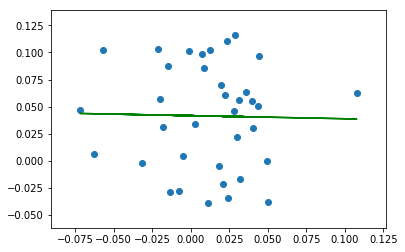

In [10]:
plt.scatter(tbl['mr_rf'],tbl['pr_rf'])
plt.plot(tbl['mr_rf'], result.fittedvalues,'g')

In [11]:
result2 = sm.ols(formula="port_ret ~ mkt_ret", data=tbl).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               port_ret   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                   0.01421
Date:                Fri, 17 Nov 2017   Prob (F-statistic):              0.906
Time:                        10:10:09   Log-Likelihood:                 58.088
No. Observations:                  36   AIC:                            -112.2
Df Residuals:                      34   BIC:                            -109.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0416      0.009      4.785      0.000       0.024       0.059
mkt_ret       -0.0285      0.239     -0.119      0.906      -0.514       0.457
==============================================================================
Omnibus:                        8.203   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                2.439
Skew:                          -0.167   Prob(JB):                        0.295
Kurtosis:                       1.769   Cond. No.                         28.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

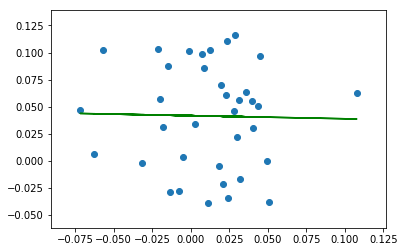

In [12]:
plt.scatter(tbl['mkt_ret'],tbl['port_ret'])
plt.plot(tbl['mkt_ret'], result2.fittedvalues,'g')

In [13]:
start = datetime.datetime(2010, 12, 31)
end = datetime.datetime(2013, 12, 31)
gspc = web.DataReader("^GSPC", 'yahoo', start, end)[['Adj Close']].pct_change()
amzn = web.DataReader("AMZN", 'yahoo', start, end)[['Adj Close']].pct_change()

In [14]:
tbl2 = pd.concat([amzn,gspc], axis=1, join='outer')[1:]
tbl2.columns = ['AMZNr','GSPCr']
tbl2['250beta'] = tbl2['GSPCr'].rolling(window=250).cov(tbl2['AMZNr'])/tbl2['GSPCr'].rolling(window=250).var()
tbl2['250alpha'] = tbl2['AMZNr'].rolling(window=250).mean() - tbl2['250beta'] * tbl2['GSPCr'].rolling(window=250).mean()
tbl2.tail()

,AMZNr,GSPCr,250beta,250alpha
Date,,,,
2013-12-24,-0.0092326,0.0029157,1.2594895,0.0007193
2013-12-26,0.0130010,0.0047455,1.2619081,0.0007394
2013-12-27,-0.0156038,-0.0003366,1.2622950,0.0006710
2013-12-30,-0.0118318,-0.0001793,1.2783866,0.0006349
2013-12-31,0.0137784,0.0039597,1.2822029,0.0006373


These values are very similar to the ones in outs on pages 173 to 175.

In [15]:
result3 = sm.ols(formula="AMZNr ~ GSPCr", data=tbl2[-250:]).fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  AMZNr   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     89.09
Date:                Fri, 17 Nov 2017   Prob (F-statistic):           2.89e-18
Time:                        10:10:13   Log-Likelihood:                 702.44
No. Observations:                 250   AIC:                            -1401.
Df Residuals:                     248   BIC:                            -1394.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0006      0.001      0.682      0.496      -0.001       0.002
GSPCr          1.2822      0.136      9.439      0.000       1.015       1.550
==============================================================================
Omnibus:                       61.876   Durbin-Watson:                   2.154
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.117
Skew:                           0.516   Prob(JB):                    8.88e-171
Kurtosis:                      11.609   Cond. No.                         147.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The output is the the same as the values in the last row above, meaning the calculations are correct.

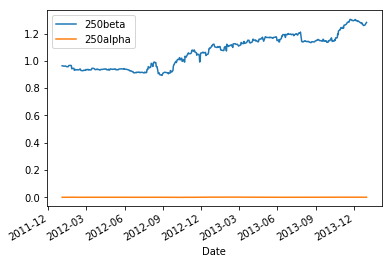

In [16]:
tbl2[['250beta','250alpha']]['2012':].plot()

Text(0.5,1,u'Rolling Beta')

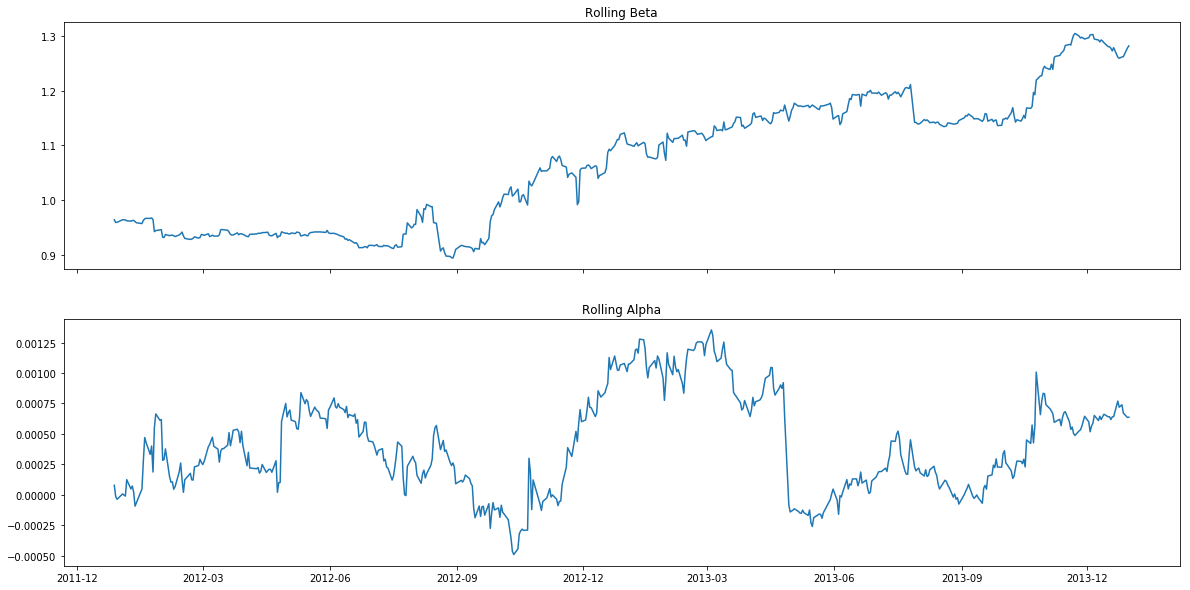

In [17]:
fig, axes = plt.subplots(2,figsize=(20,10),sharex=True)
axes[1].plot(tbl2.index,tbl2['250alpha'])
axes[1].set_title('Rolling Alpha')
axes[0].plot(tbl2.index,tbl2['250beta'])
axes[0].set_title('Rolling Beta')

The plot above is the same as the one in Figure 5.1 on page 176.

In [18]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y%m')
ff = pd.read_csv('F-F_Research_Data_Factors.csv',index_col=0, parse_dates=True, date_parser=dateparse)['2011':'2013']
ff = ff / 100
ff.head()

,Mkt-RF,SMB,HML,RF
2011-01-01,0.0199000,-0.0247000,0.0081000,0.0001000
2011-02-01,0.0349000,0.0152000,0.0109000,0.0001000
2011-03-01,0.0045000,0.0260000,-0.0155000,0.0001000
2011-04-01,0.0290000,-0.0034000,-0.0251000,0.0000000
2011-05-01,-0.0127000,-0.0070000,-0.0206000,0.0000000


In [19]:
hp2 = pd.Series(np.random.uniform(-0.05, 0.15, 36), index=pd.date_range('1/1/2011', periods=36, freq='MS'))
hp2.tail()

2013-08-01    0.0466677
2013-09-01    0.0157606
2013-10-01    0.0979906
2013-11-01   -0.0332337
2013-12-01    0.1138265
Freq: MS, dtype: float64

In [20]:
tbl3 = pd.concat([ff,hp2], axis = 1, join='outer')
tbl3.columns = ['Mkt_RF','SMB','HML','RF','HPr']
tbl3['HPr_RF'] = tbl3['HPr'] - tbl3['RF']
tbl3.head()

,Mkt_RF,SMB,HML,RF,HPr,HPr_RF
2011-01-01,0.0199000,-0.0247000,0.0081000,0.0001000,0.0468847,0.0467847
2011-02-01,0.0349000,0.0152000,0.0109000,0.0001000,0.0827000,0.0826000
2011-03-01,0.0045000,0.0260000,-0.0155000,0.0001000,0.0508870,0.0507870
2011-04-01,0.0290000,-0.0034000,-0.0251000,0.0000000,0.0049344,0.0049344
2011-05-01,-0.0127000,-0.0070000,-0.0206000,0.0000000,-0.0461689,-0.0461689


In [21]:
result4 = sm.ols(formula="HPr_RF ~ Mkt_RF + SMB + HML", data=tbl3).fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 HPr_RF   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                 -0.045
Method:                 Least Squares   F-statistic:                    0.4966
Date:                Fri, 17 Nov 2017   Prob (F-statistic):              0.687
Time:                        10:10:14   Log-Likelihood:                 51.726
No. Observations:                  36   AIC:                            -95.45
Df Residuals:                      32   BIC:                            -89.12
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0501      0.011      4.481      0.000       0.027       0.073
Mkt_RF         0.1219      0.352      0.346      0.731      -0.595       0.839
SMB           -0.8308      0.739     -1.125      0.269      -2.336       0.674
HML            0.2338      0.713      0.328      0.745      -1.218       1.686
==============================================================================
Omnibus:                        6.590   Durbin-Watson:                   2.132
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                2.249
Skew:                          -0.182   Prob(JB):                        0.325
Kurtosis:                       1.831   Cond. No.                         77.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The output above is similar to the one on page 179.

In [22]:
result5 = sm.ols(formula="HPr_RF ~ Mkt_RF", data=tbl3).fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 HPr_RF   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.028
Method:                 Least Squares   F-statistic:                   0.04294
Date:                Fri, 17 Nov 2017   Prob (F-statistic):              0.837
Time:                        10:10:14   Log-Likelihood:                 50.930
No. Observations:                  36   AIC:                            -97.86
Df Residuals:                      34   BIC:                            -94.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0526      0.011      4.892      0.000       0.031       0.074
Mkt_RF        -0.0578      0.279     -0.207      0.837      -0.624       0.509
==============================================================================
Omnibus:                        8.428   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                2.368
Skew:                          -0.091   Prob(JB):                        0.306
Kurtosis:                       1.757   Cond. No.                         27.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Again variables are not significant, most likely due to a random nature of portfolio returns being created. 

In [33]:
# nflx= web.DataReader("NFLX", 'yahoo', start, end)[['Adj Close']].pct_change()['2012-07-20':'2013-07-23']
# nflx.columns=['Returns']
# nflx.tail()

nflx= web.DataReader("NFLX", 'yahoo', start, end)[['Adj Close']].pct_change()['2012-07-20':'2013-07-23']*100
gspc_nflx = web.DataReader("^GSPC", 'yahoo', start, end)[['Adj Close']].pct_change()['2012-07-20':'2013-07-23']*100
tbl4 = pd.concat([nflx,gspc_nflx], axis = 1, join='outer')
tbl4.columns=['NFLX','GSPC']
tbl4.head()

,NFLX,GSPC
Date,,
2012-07-20,-1.5640098,-1.0061660
2012-07-23,-2.2977231,-0.8909056
2012-07-24,0.5629159,-0.9040933
2012-07-25,-25.0155495,-0.0313861
2012-07-26,-5.4246752,1.6540975


The output is similar to the one on page 185.

In [34]:
result6 = sm.ols(formula="NFLX ~ GSPC", data=tbl4).fit()
result6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   NFLX   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     6.685
Date:                Fri, 17 Nov 2017   Prob (F-statistic):             0.0103
Time:                        10:20:16   Log-Likelihood:                -751.22
No. Observations:                 252   AIC:                             1506.
Df Residuals:                     250   BIC:                             1514.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4600      0.304      1.516      0.131      -0.138       1.058
GSPC           1.0308      0.399      2.585      0.010       0.246       1.816
==============================================================================
Omnibus:                      207.136   Durbin-Watson:                   1.708
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8212.299
Skew:                           2.811   Prob(JB):                         0.00
Kurtosis:                      30.396   Cond. No.                         1.34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div style='color:red'>Unable to follow calculations on page 187.</div>

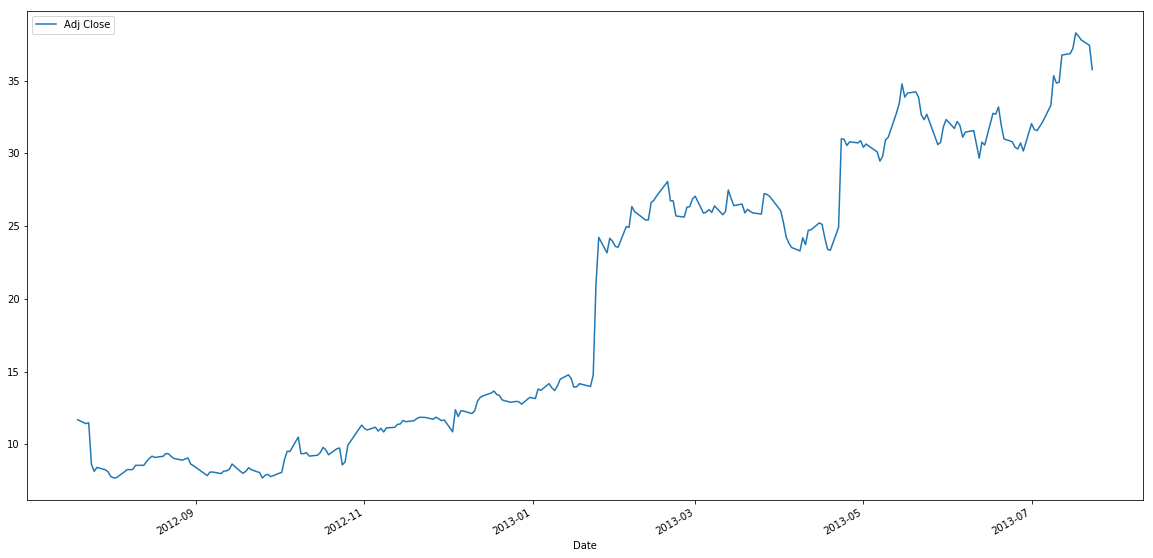

In [38]:
web.DataReader("NFLX", 'yahoo', start, end)[['Adj Close']]['2012-07-20':'2013-07-23'].plot(figsize=(20,10))

The chart above is similar to the one on page 188.

<div style='color:red'>Unable to follow calculations on page 188-9.</div>